# Korteweg–De Vries equation
#### Korteweg–De Vries equation is a mathematical model that describes the propagation of long waves in shallow water. This Jupyter Notebook is an attempt to obtain data-driven solution of this partial differential equation !

In [70]:
import torch
import numpy as np
import torch.nn as nn
import torch.optim as optim
import scipy.io
import matplotlib.pyplot as plt

In [71]:
sample_data = scipy.io.loadmat("/Users/kartikgoyal/Downloads/kdV.mat")
sample_data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Fri Nov 10 22:10:58 2017',
 '__version__': '1.0',
 '__globals__': [],
 'tt': array([[0.   , 0.005, 0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 ,
         0.045, 0.05 , 0.055, 0.06 , 0.065, 0.07 , 0.075, 0.08 , 0.085,
         0.09 , 0.095, 0.1  , 0.105, 0.11 , 0.115, 0.12 , 0.125, 0.13 ,
         0.135, 0.14 , 0.145, 0.15 , 0.155, 0.16 , 0.165, 0.17 , 0.175,
         0.18 , 0.185, 0.19 , 0.195, 0.2  , 0.205, 0.21 , 0.215, 0.22 ,
         0.225, 0.23 , 0.235, 0.24 , 0.245, 0.25 , 0.255, 0.26 , 0.265,
         0.27 , 0.275, 0.28 , 0.285, 0.29 , 0.295, 0.3  , 0.305, 0.31 ,
         0.315, 0.32 , 0.325, 0.33 , 0.335, 0.34 , 0.345, 0.35 , 0.355,
         0.36 , 0.365, 0.37 , 0.375, 0.38 , 0.385, 0.39 , 0.395, 0.4  ,
         0.405, 0.41 , 0.415, 0.42 , 0.425, 0.43 , 0.435, 0.44 , 0.445,
         0.45 , 0.455, 0.46 , 0.465, 0.47 , 0.475, 0.48 , 0.485, 0.49 ,
         0.495, 0.5  , 0.505, 0.51 , 0.515, 0.52 , 0.525, 0.53 

In [72]:
typ=['uu','tt','x']
for i in typ:
    print(sample_data[i].shape)

(512, 201)
(1, 201)
(1, 512)


In [73]:
tt = sample_data['tt'].flatten()
x = sample_data['x'].flatten()
uu = sample_data['uu']

In [74]:
X, Y = np.meshgrid(x, tt)
X_flat = np.column_stack((X.flatten(), Y.flatten()))
uu_flat = uu.flatten()

In [75]:
X_tensor = torch.tensor(X_flat, dtype=torch.float32)
uu_tensor = torch.tensor(uu_flat, dtype=torch.float32).unsqueeze(1)

In [76]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(2, 64)  # Input layer: 2 inputs (x, t)
        self.fc2 = nn.Linear(64, 64) # Hidden layer
        self.fc3 = nn.Linear(64, 1)  # Output layer: 1 output (solution uu)

    def forward(self, x):
        x = torch.relu(self.fc1(x))  # Apply ReLU activation
        x = torch.relu(self.fc2(x))  # Apply ReLU activation
        x = self.fc3(x)              # No activation at output
        return x

In [77]:
model = SimpleNN()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [78]:
epochs = 1000
for epoch in range(epochs):
    y_pred = model(X_tensor)
    
    loss = criterion(y_pred, uu_tensor)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

Epoch [10/1000], Loss: 0.4871
Epoch [20/1000], Loss: 0.4744
Epoch [30/1000], Loss: 0.4588
Epoch [40/1000], Loss: 0.4391
Epoch [50/1000], Loss: 0.4140
Epoch [60/1000], Loss: 0.3835
Epoch [70/1000], Loss: 0.3493
Epoch [80/1000], Loss: 0.3151
Epoch [90/1000], Loss: 0.2862
Epoch [100/1000], Loss: 0.2672
Epoch [110/1000], Loss: 0.2571
Epoch [120/1000], Loss: 0.2502
Epoch [130/1000], Loss: 0.2401
Epoch [140/1000], Loss: 0.2345
Epoch [150/1000], Loss: 0.2300
Epoch [160/1000], Loss: 0.2254
Epoch [170/1000], Loss: 0.2222
Epoch [180/1000], Loss: 0.2187
Epoch [190/1000], Loss: 0.2162
Epoch [200/1000], Loss: 0.2143
Epoch [210/1000], Loss: 0.2126
Epoch [220/1000], Loss: 0.2112
Epoch [230/1000], Loss: 0.2098
Epoch [240/1000], Loss: 0.2085
Epoch [250/1000], Loss: 0.2072
Epoch [260/1000], Loss: 0.2058
Epoch [270/1000], Loss: 0.2044
Epoch [280/1000], Loss: 0.2030
Epoch [290/1000], Loss: 0.2015
Epoch [300/1000], Loss: 0.2000
Epoch [310/1000], Loss: 0.1983
Epoch [320/1000], Loss: 0.1965
Epoch [330/1000],

In [79]:
t_fixed = tt[len(tt) // 2]  # Pick a fixed t

In [80]:
X_fixed_time = np.column_stack((x, np.full_like(x, t_fixed)))  # Combine x with fixed t

In [81]:
X_fixed_time_tensor = torch.tensor(X_fixed_time, dtype=torch.float32)

In [82]:
with torch.no_grad():
    uu_fixed_time_pred = model(X_fixed_time_tensor).numpy()

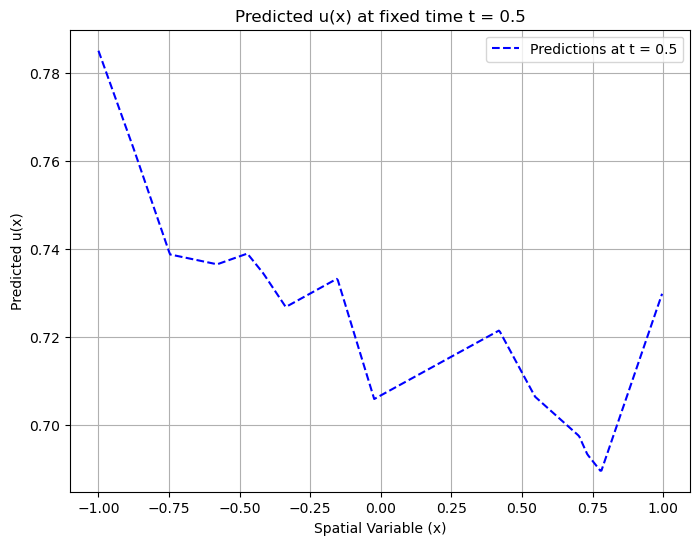

In [83]:
plt.figure(figsize=(8, 6))
plt.plot(x, uu_fixed_time_pred, label=f'Predictions at t = {t_fixed}', color='blue', linestyle='--')
plt.title(f'Predicted u(x) at fixed time t = {t_fixed}')
plt.xlabel('Spatial Variable (x)')
plt.ylabel('Predicted u(x)')
plt.legend()
plt.grid(True)
plt.show()